In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats

In [4]:
sample = np.random.randn(25)

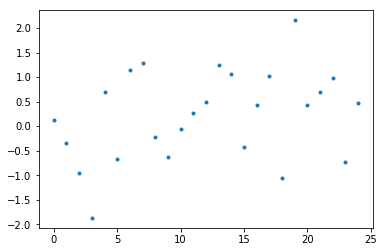

In [6]:
plt.plot(sample, '.');

In [10]:
t_statistic = ((sample.mean() - 0) / 
               (sample.std(ddof=1) / np.sqrt(len(sample))))
t_statistic

1.2110996372969627

## Where does the t distribution come from?
The t-distribution appears when you _try_ to standardize the mean of your sample by dividing by the sample standard deviation. If the mean and sample standard deviation were independent, this would just be a gaussian distribution. But they're not independent--the sample SD depends on the mean (this is also why we use the `ddof=1` correction factor)!

In [14]:
# generate a million samples of length `n`
n = 2
rands = np.random.randn(n, 1000000) # samples with mean=0, std=1

In [15]:
# compute the t statistic for each sample (this uses the sample SD)
t = (rands.mean(axis=0) / 
     (rands.std(axis=0, ddof=1) / np.sqrt(n)))

# also compute the z statistic for each sample (this uses the known SD = 1)
# this will actually be gaussian distributed
z = rands.mean(axis=0) / (1 / np.sqrt(n))

In [18]:
t.shape, z.shape

((1000000,), (1000000,))

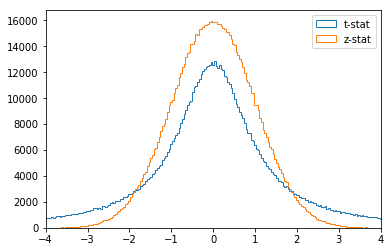

In [17]:
# for large samples (n=100?), these two distributions will be 
# VERY SIMILAR
plt.hist(t, np.linspace(-10, 10, 500), histtype='step', label="t-stat");
plt.hist(z, np.linspace(-10, 10, 500), histtype='step', label="z-stat");
plt.xlim(-4, 4);
plt.legend();

# Example of t-tests comparing different numbers of samples

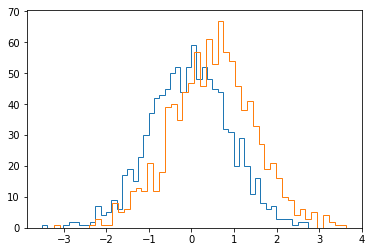

In [20]:
sample1 = np.random.randn(1000) # gaussian with mean=0, std=1, 1000 samples
sample2 = np.random.randn(1000) + 0.5 # gaussian with mean=0.5, std=1, 1000 samples

plt.hist(sample1, 50, histtype='step');
plt.hist(sample2, 50, histtype='step');

In [21]:
t_stat, t_p_val = scipy.stats.ttest_ind(sample1, sample2)
t_stat, t_p_val

(-12.668415442633085, 1.9612220150245808e-35)

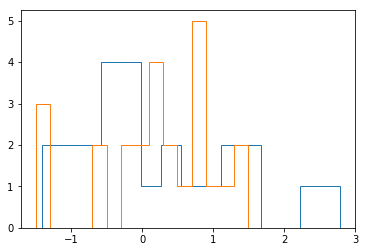

In [22]:
sample1 = np.random.randn(25) # gaussian with mean=0, std=1, 25 samples
sample2 = np.random.randn(25) + 0.5 # gaussian with mean=0.0, std=1, 25 samples

plt.hist(sample1, 15, histtype='step');
plt.hist(sample2, 15, histtype='step');

In [23]:
t_stat, t_p_val = scipy.stats.ttest_ind(sample1, sample2)
t_stat, t_p_val

(-0.20327282101116592, 0.8397810777168944)

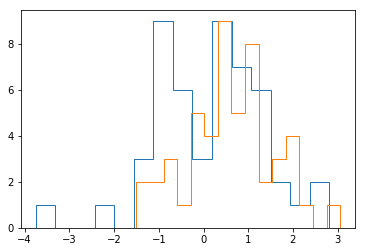

In [24]:
sample1 = np.random.randn(50) # gaussian with mean=0, std=1, 50 samples
sample2 = np.random.randn(50) + 0.5 # gaussian with mean=0.5, std=1, 50 samples

plt.hist(sample1, 15, histtype='step');
plt.hist(sample2, 15, histtype='step');

In [25]:
t_stat, t_p_val = scipy.stats.ttest_ind(sample1, sample2)
t_stat, t_p_val

(-2.092465709860251, 0.03898078993284267)